In [3]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import folium
from folium.plugins import HeatMap
%matplotlib inline
sns.set()
# income-limits-by-county-metadata.csv

In [6]:
data = pd.read_csv('data/2022-income-limits.csv', delimiter=',')
data.shape

(58, 42)

In [7]:
data.head(5)

,County,AMI,ALI_1,ALI_2,ALI_3,ALI_4,ALI_5,ALI_6,ALI_7,ALI_8,...,LI_7,LI_8,MOD_1,MOD_2,MOD_3,MOD_4,MOD_5,MOD_6,MOD_7,MOD_8
0,Alameda,142800,15000,17100,19250,21400,23100,24800,26550,28250,...,135950,144700,119950,137100,154200,171350,185050,198750,212450,226200
1,Alpine,94900,10000,11400,12850,14250,15400,16550,17650,18800,...,90100,95900,79750,91100,102500,113900,123000,132100,141250,150350
2,Amador,86600,9100,10400,11700,13000,14050,15100,16100,17150,...,85950,91500,72750,83100,93500,103900,112200,120500,128850,137150
3,Butte,85000,8950,10200,11500,12750,13750,14800,15800,16850,...,77300,82250,71400,81600,91800,102000,110150,118300,126500,134650
4,Calaveras,90000,9450,10800,12150,13500,14600,15650,16750,17800,...,89300,95050,75600,86400,97200,108000,116650,125300,133900,142550


In [10]:
los_angeles = data.loc[data['County'] == 'Los Angeles']

In [11]:
los_angeles

,County,AMI,ALI_1,ALI_2,ALI_3,ALI_4,ALI_5,ALI_6,ALI_7,ALI_8,...,LI_7,LI_8,MOD_1,MOD_2,MOD_3,MOD_4,MOD_5,MOD_6,MOD_7,MOD_8
18,Los Angeles,91100,9550,10900,12300,13650,14750,15850,16950,18000,...,118200,125800,76500,87450,98350,109300,118050,126800,135550,144300


In [21]:
acutely_low = data[['ALI_1', 'ALI_2', 'ALI_3','ALI_4','ALI_5','ALI_6', 'ALI_7', 'ALI_8']]
acutely_low

,ALI_1,ALI_2,ALI_3,ALI_4,ALI_5,ALI_6,ALI_7,ALI_8
0,15000,17100,19250,21400,23100,24800,26550,28250
1,10000,11400,12850,14250,15400,16550,17650,18800
2,9100,10400,11700,13000,14050,15100,16100,17150
3,8950,10200,11500,12750,13750,14800,15800,16850
4,9450,10800,12150,13500,14600,15650,16750,17800
5,8450,9650,10850,12050,13000,14000,14950,15900
6,15000,17100,19250,21400,23100,24800,26550,28250
7,8450,9650,10850,12050,13000,14000,14950,15900
8,10750,12300,13800,15350,16600,17800,19050,20250
9,8450,9650,10850,12050,13000,14000,14950,15900


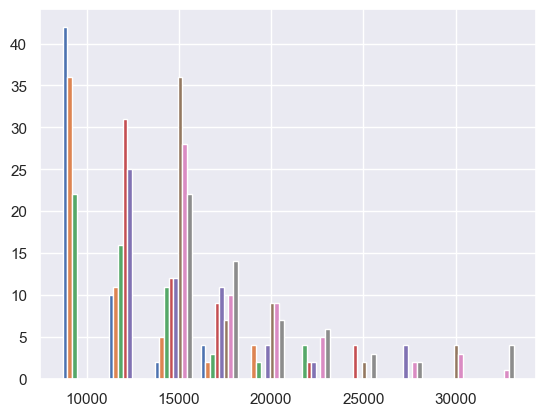

In [22]:
plt.hist(acutely_low)
plt.show()

In [19]:
extremely_low = data[['ELI_1','ELI_2','ELI_3','ELI_4','ELI_5','ELI_6', 'ELI_7', 'ELI_8']]
extremely_low

,ELI_1,ELI_2,ELI_3,ELI_4,ELI_5,ELI_6,ELI_7,ELI_8
0,30000,34300,38600,42850,46300,49750,53150,56600
1,19100,21800,24550,27750,32470,37190,41910,46630
2,18200,20800,23400,27750,32470,37190,41910,46630
3,16350,18700,23030,27750,32470,37190,41910,46630
4,18900,21600,24300,27750,32470,37190,41910,46630
5,16350,18700,23030,27750,32470,37190,41910,46630
6,30000,34300,38600,42850,46300,49750,53150,56600
7,16350,18700,23030,27750,32470,37190,41910,46630
8,21300,24350,27400,30400,32850,37190,41910,46630
9,16350,18700,23030,27750,32470,37190,41910,46630


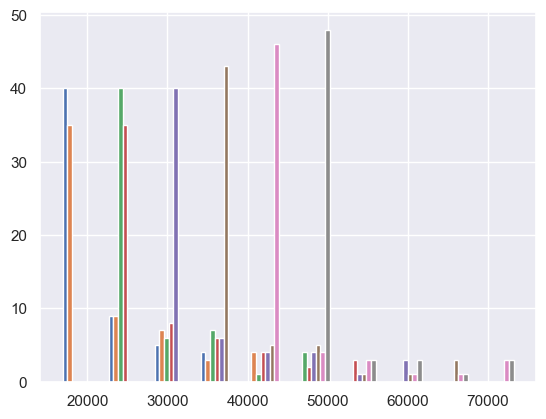

In [23]:
plt.hist(extremely_low)
plt.show()

In [24]:
very_low = data[['VLI_1', 'VLI_2','VLI_3','VLI_4','VLI_5','VLI_6','VLI_7','VLI_8']]
very_low

,VLI_1,VLI_2,VLI_3,VLI_4,VLI_5,VLI_6,VLI_7,VLI_8
0,50000,57150,64300,71400,77150,82850,88550,94250
1,31800,36350,40900,45400,49050,52700,56300,59950
2,30350,34650,39000,43300,46800,50250,53700,57200
3,27300,31200,35100,38950,42100,45200,48300,51450
4,31500,36000,40500,45000,48600,52200,55800,59400
5,27300,31200,35100,38950,42100,45200,48300,51450
6,50000,57150,64300,71400,77150,82850,88550,94250
7,27300,31200,35100,38950,42100,45200,48300,51450
8,35500,40550,45600,50650,54750,58800,62850,66900
9,27300,31200,35100,38950,42100,45200,48300,51450


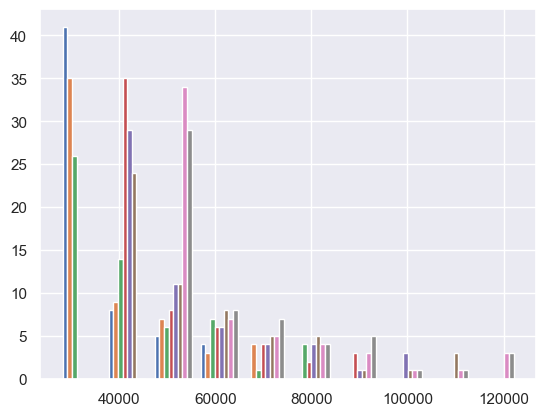

In [25]:
plt.hist(very_low)
plt.show()

In [26]:
low_income = data[['LI_1', 'LI_2', 'LI_3', 'LI_4', 'LI_5', 'LI_6', 'LI_7', 'LI_8']]
low_income

,LI_1,LI_2,LI_3,LI_4,LI_5,LI_6,LI_7,LI_8
0,76750,87700,98650,109600,118400,127150,135950,144700
1,50900,58150,65400,72650,78500,84300,90100,95900
2,48550,55450,62400,69300,74850,80400,85950,91500
3,43650,49850,56100,62300,67300,72300,77300,82250
4,50400,57600,64800,72000,77800,83550,89300,95050
5,43650,49850,56100,62300,67300,72300,77300,82250
6,76750,87700,98650,109600,118400,127150,135950,144700
7,43650,49850,56100,62300,67300,72300,77300,82250
8,56750,64850,72950,81050,87550,94050,100550,107000
9,43650,49850,56100,62300,67300,72300,77300,82250


In [ ]:
# moderate_low = data[['C']]